In [1]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
from metpy.calc import dewpoint_from_relative_humidity, wet_bulb_temperature
from metpy.units import units
from PIL import Image
import numpy as np
import datetime
import xarray as xr
import glob
import pyart


from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/pyart/io/nexrad_level3.py:72: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from xdrlib import Unpacker


In [39]:
my_glob = glob.glob('/Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023*')
xr_wxt = xr.open_mfdataset(my_glob)

In [40]:
xr_wxt

<xarray.Dataset>
Dimensions:        (time: 839832)
Coordinates:
  * time           (time) datetime64[ns] 2023-05-06 ... 2023-09-09T12:02:30
Data variables:
    temperature    (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    humidity       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    pressure       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    rainfall       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    dewpoint       (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wetbulb        (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_dir_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_mean_10s  (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
    wind_max_10s   (time) float64 dask.array<chunksize=(8640,), meta=np.ndarray>
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-WXT-002
    datastream:   CMS_wxt536_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

(10.0, 40.0)

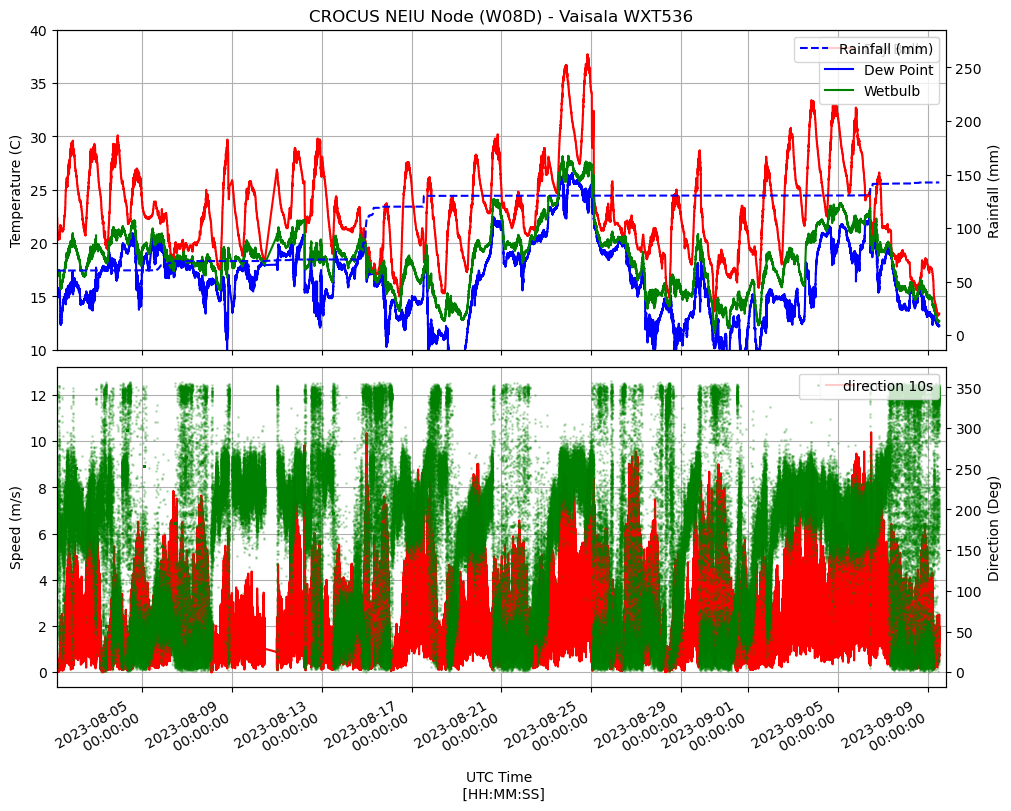

In [42]:
time1 = pd.Timestamp("2023-08-01 05:00:00")
time2 = pd.Timestamp("2023-09-09 19:00:00")


fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_wxt.temperature.plot(ax=axs[0], color='r', label='Dry Bulb')
xr_wxt.dewpoint.plot(color='b', label='Dew Point',ax=axs[0])
xr_wxt.wetbulb.plot(color='g', label='Wetbulb',ax=axs[0])

xr_wxt.wind_mean_10s.plot(ax=axs[1], color='r', label='mean 10s')
ytwin = plt.twinx()

xr_wxt.wind_dir_10s.plot(ax=ytwin, color='g', label='direction 10s', marker='.', linestyle='none', 
                         markersize=2, alpha = 0.2)

axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala WXT536')
axs[0].set_xlabel('')
axs[0].set_ylabel('Temperature (C)')


axs[1].set_xlabel('UTC Time \n [HH:MM:SS]')
axs[1].set_ylabel('Speed (m/s)')
axs[0].grid()
axs[1].grid()

my_twin = plt.twinx(ax = axs[0])
xr_wxt.rainfall.plot(ax=my_twin, label = 'Rainfall (mm)', color='b', linestyle='dashed')

my_twin.set_ylabel('Rainfall (mm)')
my_twin.legend(loc=1)


axs[0].legend()
axs[0].grid(True)

axs[1].legend()
axs[1].grid(True)

ytwin.set_ylabel('Direction (Deg)')
ytwin.legend(loc=1)

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

axs[1].xaxis.set_major_formatter(date_form)
axs[0].set_xticklabels([])

axs[1].set_xlim(time1, time2)
axs[0].set_xlim(time1, time2)

#my_twin.set_ylim(30,85)
axs[0].set_ylim(10,40)






In [2]:
xr_aqt = xr.open_mfdataset('/Users/scollis/data/aqt/CMS_aqt580_NEIU_a1_20230726_000000Z.nc')

In [2]:
my_glob = glob.glob('/Users/scollis/data/aqt/CMS_aqt580_NEIU_a1_20230*')
xr_aqt = xr.open_mfdataset(my_glob)

In [3]:
xr_aqt

/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/xarray/core/formatting_html.py:22: DeprecationWarning: read_binary is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  read_binary(package, resource).decode("utf-8")
/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/xarray/core/formatting_html.py:22: DeprecationWarning: read_binary is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  read_binary(package, resource).decode("utf-8")


<xarray.Dataset>
Dimensions:           (time: 137942)
Coordinates:
  * time              (time) datetime64[ns] 2023-05-05T15:40:15.011519287 ......
Data variables: (12/25)
    name              (time) object dask.array<chunksize=(482,), meta=np.ndarray>
    meta.description  (time) object dask.array<chunksize=(482,), meta=np.ndarray>
    meta.host         (time) object dask.array<chunksize=(482,), meta=np.ndarray>
    meta.job          (time) object dask.array<chunksize=(46438,), meta=np.ndarray>
    meta.missing      (time) object dask.array<chunksize=(482,), meta=np.ndarray>
    meta.node         (time) object dask.array<chunksize=(482,), meta=np.ndarray>
    ...                ...
    temp              (time) float64 dask.array<chunksize=(482,), meta=np.ndarray>
    hum               (time) float64 dask.array<chunksize=(482,), meta=np.ndarray>
    dewpoint          (time) float64 dask.array<chunksize=(482,), meta=np.ndarray>
    temperature       (time) float64 dask.array<chunksize=(67775,), meta=np.ndarray>
    humidity          (time) float64 dask.array<chunksize=(67775,), meta=np.ndarray>
    pressure          (time) float64 dask.array<chunksize=(67775,), meta=np.ndarray>

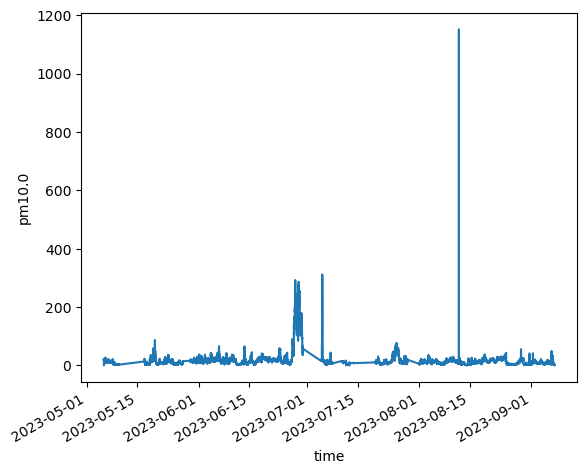

In [4]:
xr_aqt['pm10.0'].plot()

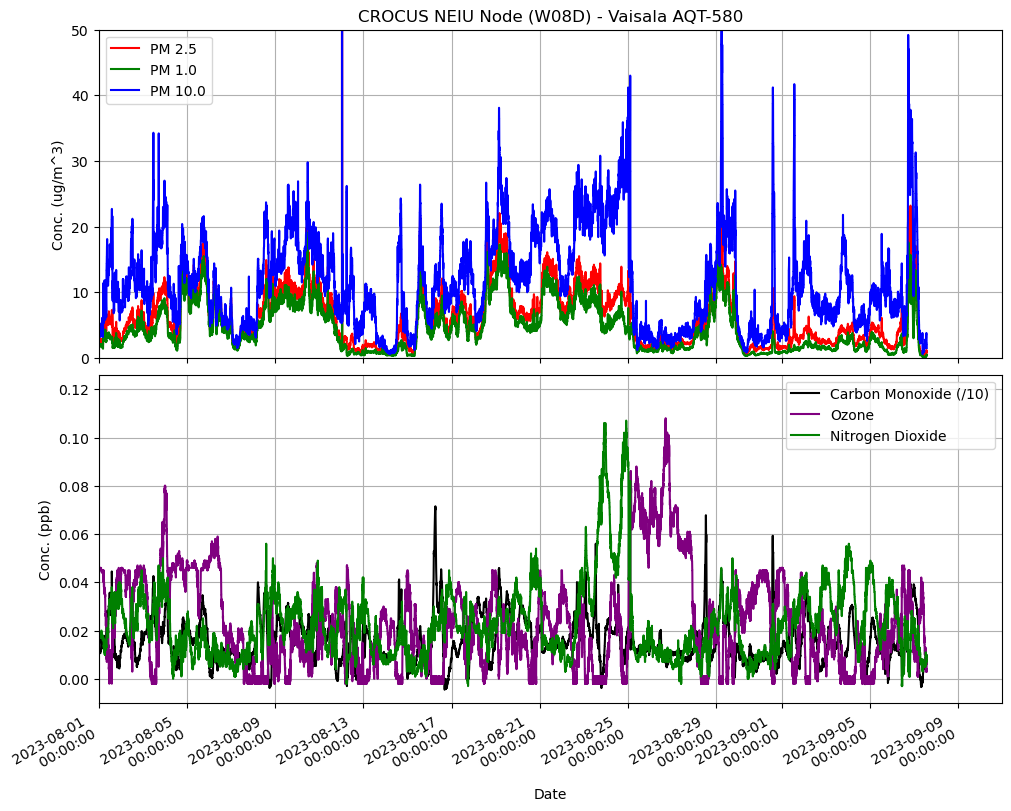

In [7]:
time1 = pd.Timestamp("2023-08-01 00:00:00")
time2 = pd.Timestamp("2023-09-10 23:00:00")


fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
#xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')

axs[0].set_ylim([0, 50])

axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')

axs[0].legend()

axs[1].set_title('')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Conc. (ppb)')

axs[1].legend()

axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[0].grid()
axs[1].grid()
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[1].xaxis.set_major_formatter(date_form)


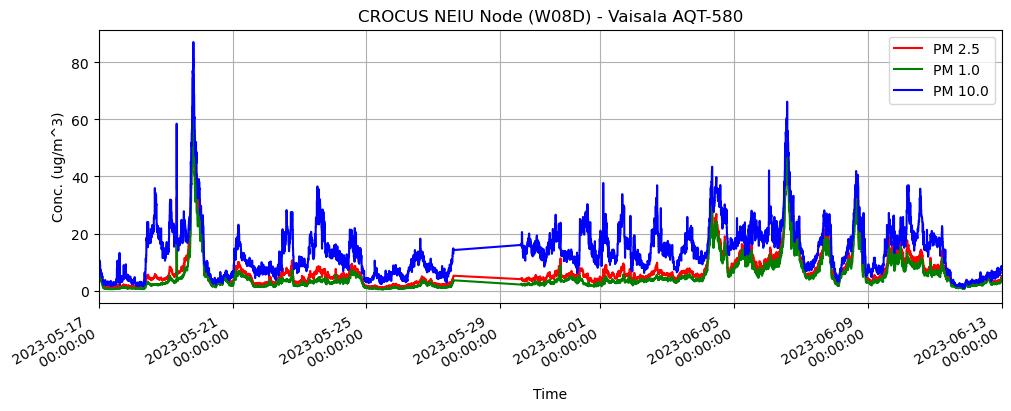

In [11]:
time1 = pd.Timestamp("2023-05-17 00:00:00")
time2 = pd.Timestamp("2023-06-23 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=1, figsize=[10,4], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs, color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs, color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs, color='b', label='PM 10.0')



axs.set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs.set_xlabel('Time')
axs.set_ylabel('Conc. (ug/m^3)')

axs.legend()

axs.set_xlim(time1, time2)
axs.set_xlim(time1, time2)
axs.grid()

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs.xaxis.set_major_formatter(date_form)


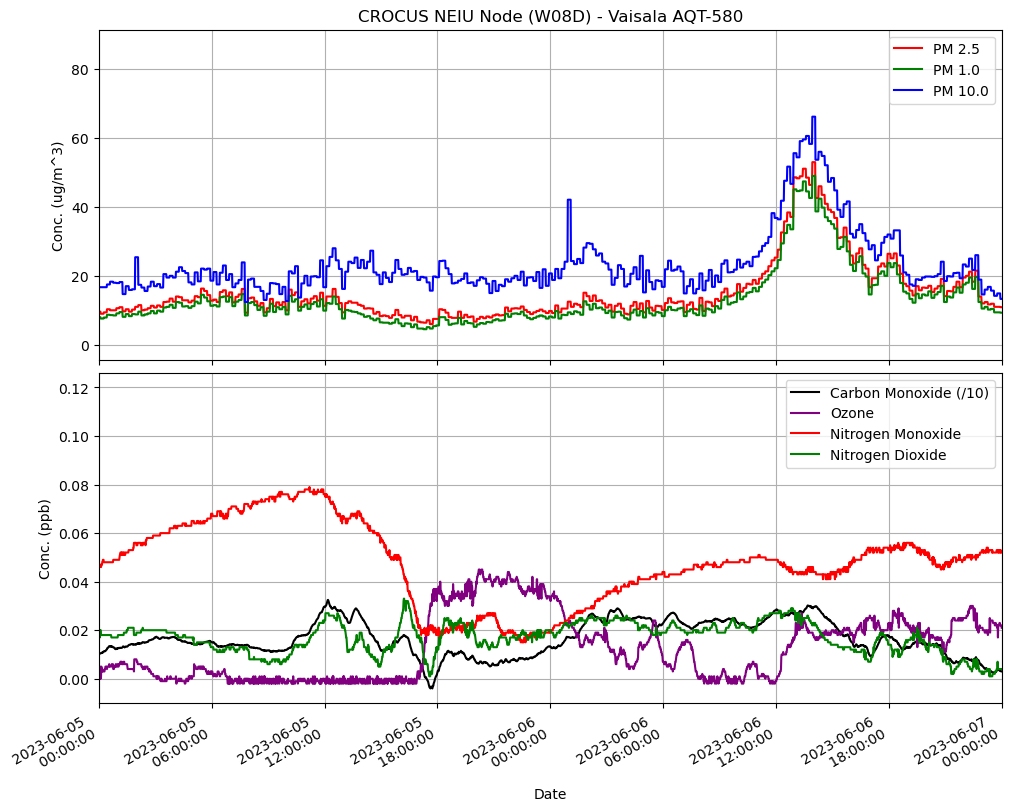

In [59]:


time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')

axs[0].legend()

axs[1].set_title('')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Conc. (ppb)')

axs[1].legend()

axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[0].grid()
axs[1].grid()

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[1].xaxis.set_major_formatter(date_form)


In [15]:
cl61_data = xr.open_dataset('/Users/scollis/data/QC-wildfire-plume.nc')

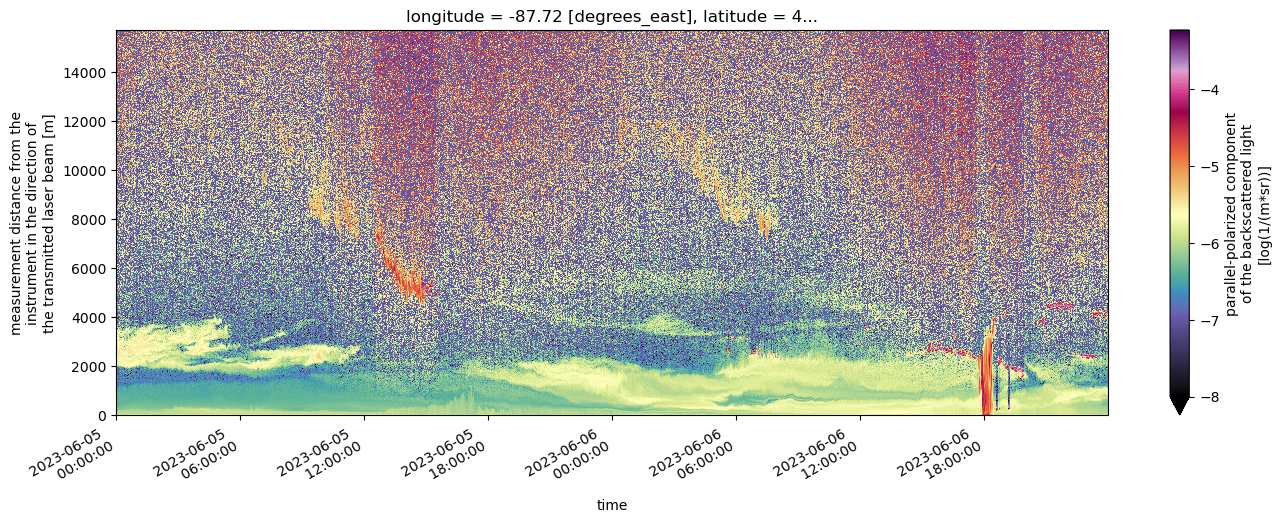

In [64]:
figme = plt.figure(figsize=[16,5])
cl61_data.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)


In [73]:
my_glob = glob.glob('/Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023060*')
xr_wxt = xr.open_mfdataset(my_glob)

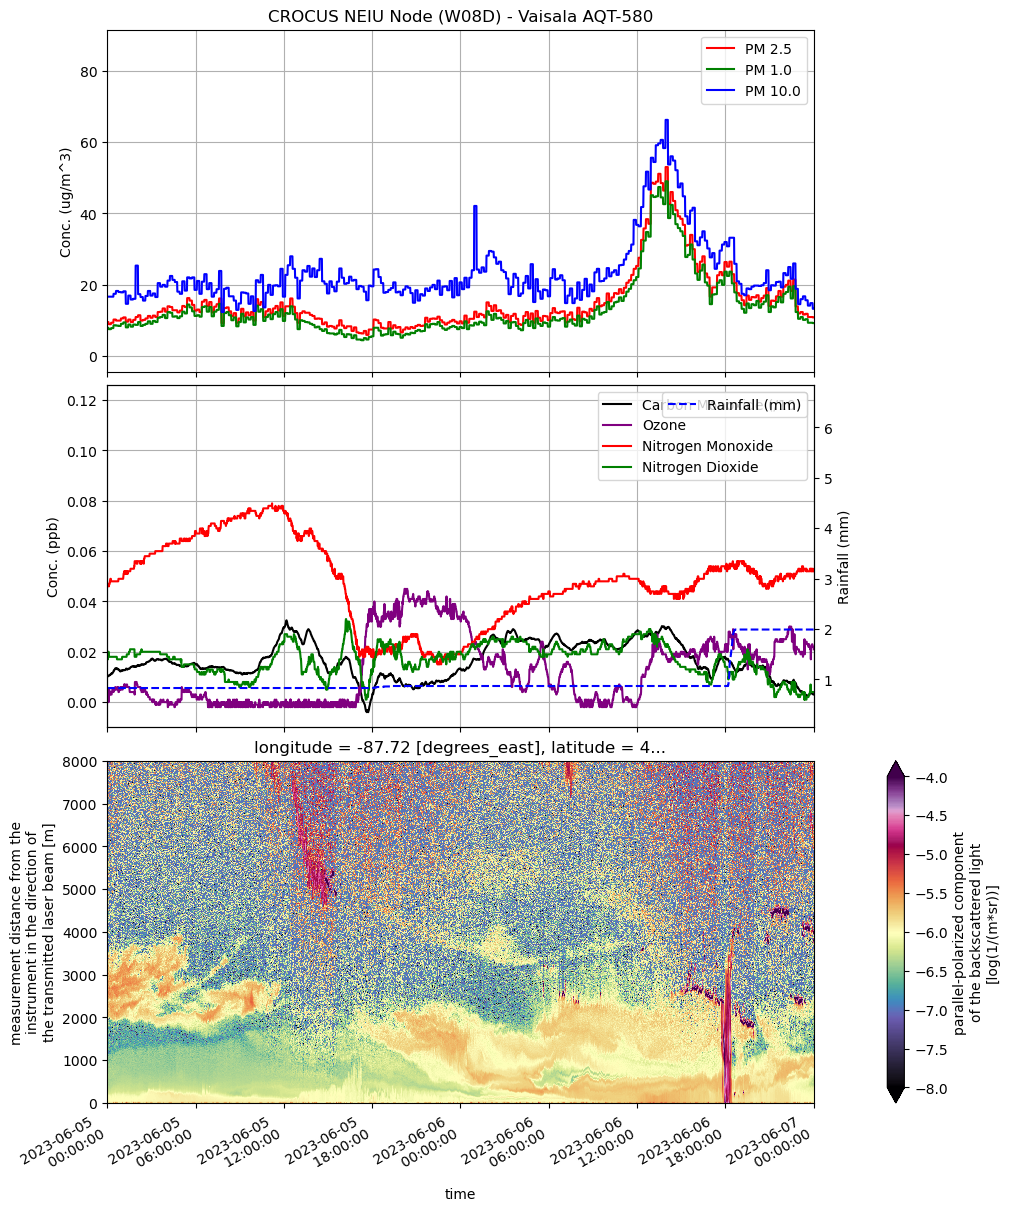

In [16]:


time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=3, figsize=[10,12], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')


axs[1].set_title('')
axs[1].set_xlabel('')
axs[1].set_ylabel('Conc. (ppb)')



axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
axs[0].grid()
axs[1].grid()

my_twin = plt.twinx(ax = axs[1])
xr_wxt.rainfall.plot(ax=my_twin, label = 'Rainfall (mm)', color='b', linestyle='dashed')

my_twin.set_ylabel('Rainfall (mm)')

axs[1].legend()
axs[0].legend()
my_twin.legend()

cl61_data.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, 
                                       vmin = -8, vmax = -4, ax=axs[2])
axs[2].set_ylim([0,8000])
axs[2].set_xlim(time1, time2)

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[2].xaxis.set_major_formatter(date_form)




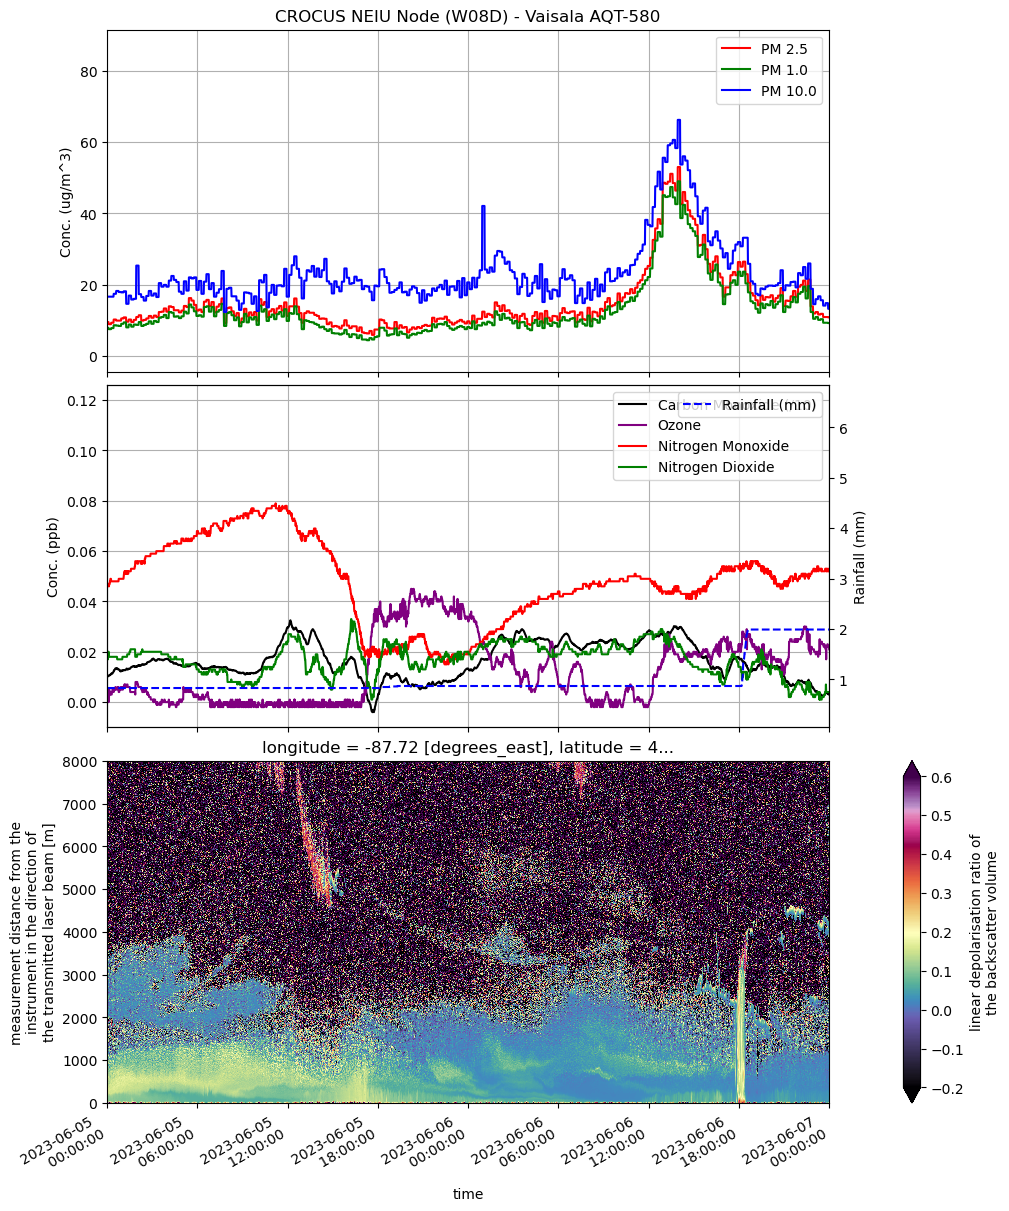

In [19]:


time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")


fig, axs = plt.subplots( ncols=1, nrows=3, figsize=[10,12], constrained_layout=True)
xr_aqt['pm2.5'].plot(ax=axs[0], color='r', label='PM 2.5')
xr_aqt['pm1.0'].plot(ax=axs[0], color='g', label='PM 1.0')
xr_aqt['pm10.0'].plot(ax=axs[0], color='b', label='PM 10.0')

(xr_aqt.co/10.).plot(ax=axs[1], color='k', label='Carbon Monoxide (/10)')
xr_aqt.o3.plot(ax=axs[1], color='purple', label='Ozone')
xr_aqt.no.plot(ax=axs[1], color='r', label='Nitrogen Monoxide ')
xr_aqt.no2.plot(ax=axs[1], color='g', label='Nitrogen Dioxide')


axs[0].set_title('CROCUS NEIU Node (W08D) - Vaisala AQT-580')
axs[0].set_xlabel('')
axs[0].set_ylabel('Conc. (ug/m^3)')


axs[1].set_title('')
axs[1].set_xlabel('')
axs[1].set_ylabel('Conc. (ppb)')



axs[0].set_xlim(time1, time2)
axs[1].set_xlim(time1, time2)
axs[1].set_ylim([-0.01,0.126])
axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
axs[0].grid()
axs[1].grid()

my_twin = plt.twinx(ax = axs[1])
xr_wxt.rainfall.plot(ax=my_twin, label = 'Rainfall (mm)', color='b', linestyle='dashed')

my_twin.set_ylabel('Rainfall (mm)')

axs[1].legend()
axs[0].legend()
my_twin.legend()

cl61_data.linear_depol_ratio.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, 
                                       vmax=.6, vmin=-.2, ax=axs[2])
axs[2].set_ylim([0,8000])
axs[2].set_xlim(time1, time2)

date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
axs[2].xaxis.set_major_formatter(date_form)




In [75]:
plt.twinx?

In [18]:
cl61_data

<xarray.Dataset>
Dimensions:                            (time: 2875, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 2023-06-05T00:00...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 ...
    latitude                           float64 ...
Data variables: (12/27)
    cloud_base_heights                 (time, layer) float64 ...
    vertical_visibility                (time) float64 ...
    p_pol                              (time, range) float32 ...
    x_pol                              (time, range) float32 ...
    beta_att                           (time, range) float32 ...
    linear_depol_ratio                 (time, range) float32 ...
    ...                                 ...
    receiver_gain                      (time) float32 ...
    range_resolution                   (time) float32 ...
    cloud_calibration_factor           (time) float64 ...
    cloud_calibration_factor_user      (time) float64 ...
    overlap_function                   (time, range) float32 ...
    backscatter                        (time, range) float32 ...
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['19700108', '19700108', '19700108', '197...
    _file_times:                    ['235111', '235111', '235111', '235111', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

In [ ]:
test_data = xr.load_dataset('//Users/scollis/data/wxt/CMS_wxt536_NEIU_a1_2023062